In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv(r"C:\Users\reddy\archive (2)\mnist_train.csv")

In [3]:
df2=pd.read_csv(r"C:\Users\reddy\archive (2)\mnist_test.csv")

In [4]:
df1.shape

(60000, 785)

In [5]:
df1.iloc[8,1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  63, 197,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  2

In [6]:
r0=df1.iloc[8,1:].values

In [7]:
type(r0)

numpy.ndarray

In [8]:
r0.size

784

In [9]:
r0=np.reshape(r0,(28,28))

In [10]:
r0

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
import matplotlib.pyplot as plt

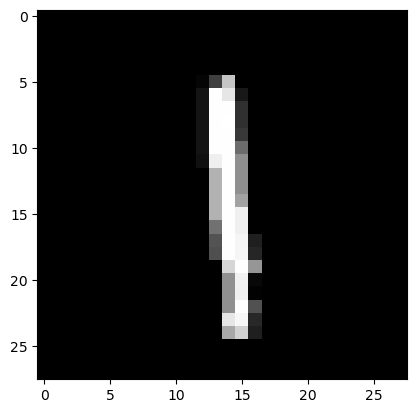

In [12]:
plt.imshow(r0,cmap="gray")

In [13]:
df1=pd.read_csv(r"C:\Users\reddy\archive (2)\mnist_train.csv")

In [14]:
df2=pd.read_csv(r"C:\Users\reddy\archive (2)\mnist_test.csv")

In [15]:
x_train = df1.iloc[:, 1:].values.reshape(-1, 28*28) / 255.0
y_train = df1.iloc[:, 0]

In [16]:
x_test = df2.iloc[:, 1:].values.reshape(-1, 28*28) / 255.0
y_test = df2.iloc[:, 0]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xTrain,xVal,yTrain,yVal=train_test_split(x_train,y_train,random_state=23,stratify=y_train,test_size=0.2)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()


In [21]:

xTrain_pp = scaler.fit_transform(xTrain)
xVal_pp = scaler.transform(xVal)
xTest_pp = scaler.transform(x_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
knc=KNeighborsClassifier()

In [24]:
knc = KNeighborsClassifier(n_neighbors=3)  
knc.fit(xTrain_pp, yTrain) 

KNeighborsClassifier(n_neighbors=3)

In [25]:
yTrainPred=knc.predict(xTrain_pp)

In [26]:

val_preds = knc.predict(xVal_pp)          
val_acc = accuracy_score(yVal, val_preds)  
print("Validation Accuracy:", val_acc)


Validation Accuracy: 0.972


In [27]:
test_preds = knc.predict(xTest_pp)         
test_acc = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9693


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_preds)

In [29]:
cm

array([[ 973,    1,    1,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    7,  993,    2,    0,    0,    1,   17,    2,    0],
       [   0,    1,    3,  977,    1,   12,    1,    8,    5,    2],
       [   2,    7,    0,    0,  946,    0,    4,    2,    0,   21],
       [   6,    0,    0,   12,    2,  860,    5,    1,    1,    5],
       [   6,    3,    0,    0,    3,    2,  944,    0,    0,    0],
       [   0,   24,    4,    1,    4,    0,    0,  985,    0,   10],
       [   7,    3,    5,   16,    6,   10,    2,    5,  915,    5],
       [   2,    5,    2,    9,    8,    2,    1,   11,    2,  967]],
      dtype=int64)

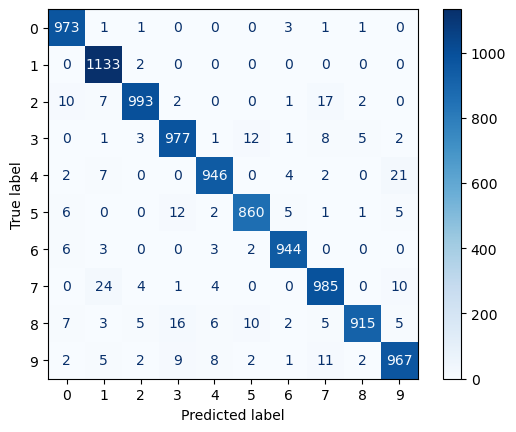

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')

In [31]:
val_preds = knc.predict(xVal_pp)
cm = confusion_matrix(yVal, val_preds)


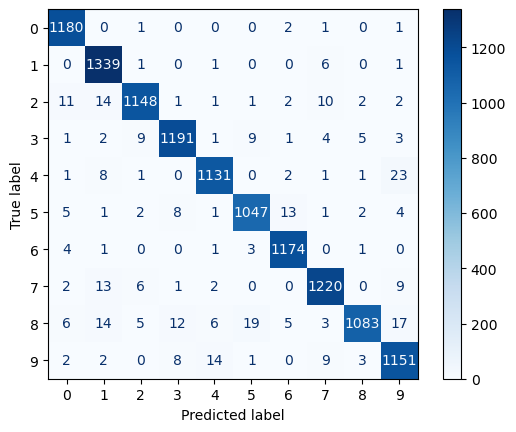

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')

In [33]:
knc.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [35]:
img_path =r"C:\Users\reddy\OneDrive\Pictures\w1.png"
img = Image.open(img_path).convert('L')  

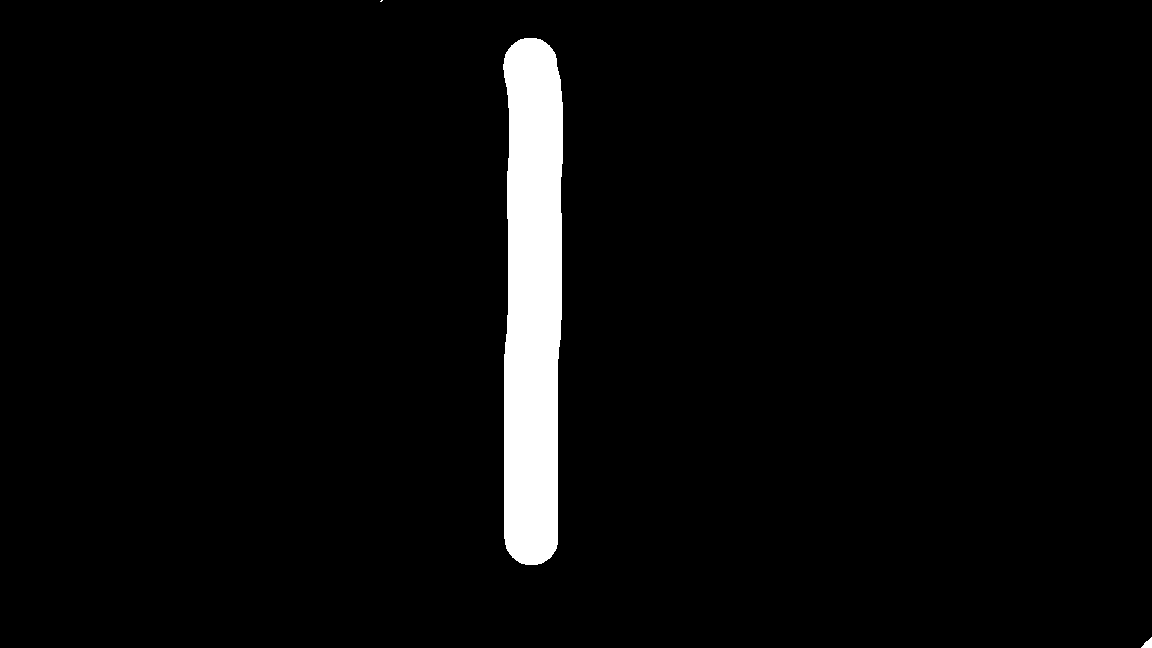

In [36]:
img

In [37]:
img = img.resize((28, 28))


In [38]:
img

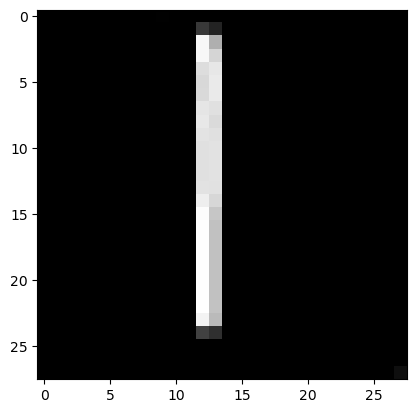

In [39]:
plt.imshow(img, cmap='gray')


In [40]:
img_arr = np.array(img)

In [41]:
img_arr

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44,
         28,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193,
        137,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 193,
        167,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 173,
        181,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169,
        183,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [42]:
img_arr = np.array(img)

In [43]:
 x_input = img_arr.reshape(-1, 28*28)/ 255.0

In [44]:
x_input.shape

(1, 784)

In [45]:
x_input_pp = scaler.transform(x_input)

In [46]:
predicted_digit = knc.predict(x_input_pp)
print("Predicted digit:", predicted_digit[0])

Predicted digit: 1
